<a href="https://colab.research.google.com/github/chirag-miskin/Stock-Prediction-Bitcoin-/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading data
import pandas as pd
btc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTC-INR.csv")
print(btc.head())
print("\nTraining days = ", btc.shape)
btc.isnull().any()
btc = btc.fillna(method='ffill')

         Date         Open        High  ...        Close    Adj Close        Volume
0  2020-06-13  720128.2500  721075.875  ...  719713.6250  719713.6250  1.334133e+12
1  2020-06-14  719886.5625  720244.875  ...  712992.6875  712992.6875  1.442556e+12
2  2020-06-15  712935.5625  721046.750  ...  718047.8125  718047.8125  2.028597e+12
3  2020-06-16  718318.6250  726470.375  ...  728741.8125  728741.8125  1.647690e+12
4  2020-06-17  728417.8125  728927.000  ...  724133.6250  724133.6250  1.541241e+12

[5 rows x 7 columns]

Training days =  (366, 7)


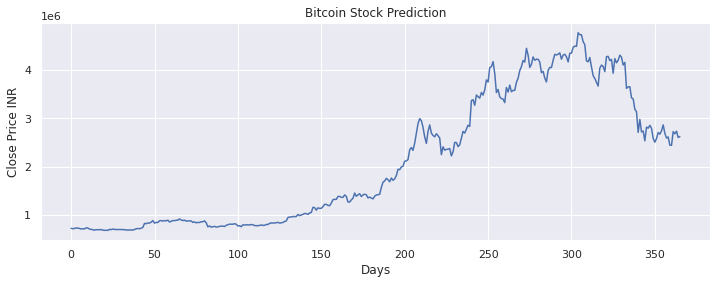

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12,4))
plt.title("Bitcoin Stock Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price INR")
plt.plot(btc["Close"])
plt.show()

In [ ]:
btc = btc[["Close"]]
print(btc.head())

         Close
0  719713.6250
1  712992.6875
2  718047.8125
3  728741.8125
4  724133.6250


In [ ]:
futureDays = 25
btc["Prediction"] = btc[["Close"]].shift(-futureDays)
print(btc.head())
print(btc.tail())

         Close   Prediction
0  719713.6250  706560.6250
1  712992.6875  697124.2500
2  718047.8125  697383.1250
3  728741.8125  694832.4375
4  724133.6250  697210.0000
          Close  Prediction
361  2725654.00         NaN
362  2679750.50         NaN
363  2734065.25         NaN
364  2603574.75         NaN
365  2623255.25         NaN


In [ ]:
import numpy as np
x = np.array(btc.drop(["Prediction"],1))[:-futureDays]
np.any(np.isnan(x))
np.all(np.isfinite(x))
print(x)

[[ 719713.625 ]
 [ 712992.6875]
 [ 718047.8125]
 [ 728741.8125]
 [ 724133.625 ]
 [ 719070.6875]
 [ 708232.3125]
 [ 711612.    ]
 [ 709423.625 ]
 [ 731276.8125]
 [ 728123.    ]
 [ 705452.875 ]
 [ 699862.625 ]
 [ 692973.125 ]
 [ 684084.8125]
 [ 691438.1875]
 [ 694011.0625]
 [ 690443.9375]
 [ 696325.6875]
 [ 683252.1875]
 [ 678634.875 ]
 [ 682009.1875]
 [ 677638.    ]
 [ 699483.0625]
 [ 693029.3125]
 [ 706560.625 ]
 [ 697124.25  ]
 [ 697383.125 ]
 [ 694832.4375]
 [ 697210.    ]
 [ 695231.125 ]
 [ 696265.9375]
 [ 690849.5625]
 [ 686567.75  ]
 [ 685416.75  ]
 [ 685989.5625]
 [ 687995.0625]
 [ 685029.5   ]
 [ 698836.9375]
 [ 710687.8125]
 [ 717179.625 ]
 [ 712641.4375]
 [ 723119.375 ]
 [ 740510.875 ]
 [ 822141.9375]
 [ 817375.875 ]
 [ 830489.3125]
 [ 830777.6875]
 [ 848466.1875]
 [ 881145.125 ]
 [ 828115.3125]
 [ 845338.0625]
 [ 841131.125 ]
 [ 878648.375 ]
 [ 882346.75  ]
 [ 870409.25  ]
 [ 881853.25  ]
 [ 875972.8125]
 [ 889387.3125]
 [ 851413.5   ]
 [ 866195.5625]
 [ 881735.6875]
 [ 88095

In [ ]:
y = np.array(btc["Prediction"])[:-futureDays]

np.any(np.isnan(y))
np.all(np.isfinite(y))
print(y)

[ 706560.625   697124.25    697383.125   694832.4375  697210.
  695231.125   696265.9375  690849.5625  686567.75    685416.75
  685989.5625  687995.0625  685029.5     698836.9375  710687.8125
  717179.625   712641.4375  723119.375   740510.875   822141.9375
  817375.875   830489.3125  830777.6875  848466.1875  881145.125
  828115.3125  845338.0625  841131.125   878648.375   882346.75
  870409.25    881853.25    875972.8125  889387.3125  851413.5
  866195.5625  881735.6875  880955.25    888203.3125  890807.1875
  915978.5625  894266.      881539.6875  890749.      868617.0625
  875311.      873954.3125  873601.4375  843803.6875  853137.9375
  835375.125   844085.6875  841479.8125  856445.4375  857813.75
  874639.1875  836109.375   752531.375   769950.4375  744882.125
  753452.625   761595.1875  747574.6875  751046.25    762048.75
  764222.8125  767254.125   758577.6875  783969.75    794767.375
  807217.4375  805666.625   805632.625   816656.5     804346.375
  769813.625   774611.125   7

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25)

In [ ]:
#Creating Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain,ytrain)

In [ ]:
#creating Linear regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [ ]:
xfuture = btc.drop(['Prediction'],1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[3668868.  ]
 [4041646.  ]
 [4104108.5 ]
 [4074136.75]
 [3968757.5 ]
 [4279028.5 ]
 [4284798.5 ]
 [4196083.  ]
 [4223535.  ]
 [3934903.  ]
 [4237814.  ]
 [4151654.75]
 [4203679.5 ]
 [4310081.5 ]
 [4267878.5 ]
 [4105709.25]
 [4160718.  ]
 [3621502.  ]
 [3651423.  ]
 [3655200.5 ]
 [3426544.5 ]
 [3404260.75]
 [3189991.25]
 [3137897.75]
 [2709442.75]]


In [ ]:
treeprediction = tree.predict(xfuture)
print("Decision Tree Prediction =",treeprediction)
tp = tree.score(xtrain,ytrain)


Decision Tree Prediction = [2978043.25 3886924.75 2736998.5  3404260.75 2819221.5  4284798.5
 2855617.5  2793746.75 2584281.75 4591076.5  4074136.75 2592088.
 2672689.5  2741540.   4499101.5  2689965.5  2592088.   2614724.
 2442683.75 2442683.75 2725654.   2679750.5  3747472.   3747472.
 3638530.75]


In [ ]:
linearprediction = linear.predict(xfuture)
print("Linear Model Prediction =",linearprediction)

Linear Model Prediction = [3651406.40520757 3984631.97800955 4040467.09258483 4013675.40004496
 3919477.08109188 4196827.76084991 4201985.55330297 4122682.93001535
 4147222.22263605 3889214.60542425 4159986.19463558 4082968.59855041
 4129473.42747977 4224585.98078837 4186860.79623091 4041898.00008383
 4091070.22115876 3609066.02438752 3635812.35159515 3639189.05194029
 3434793.87149883 3414874.46810612 3223339.35371768 3176773.06928899
 2793777.92795857]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


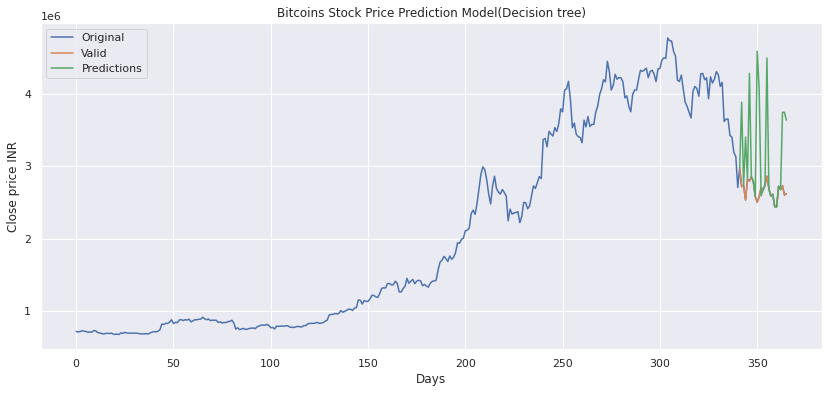

In [ ]:
#Visualize Decision tree predictions
predictions = treeprediction
valid = btc[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(14,6))
plt.title("Bitcoins Stock Price Prediction Model(Decision tree)")
plt.xlabel("Days")
plt.ylabel("Close price INR")
plt.plot(btc['Close'])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


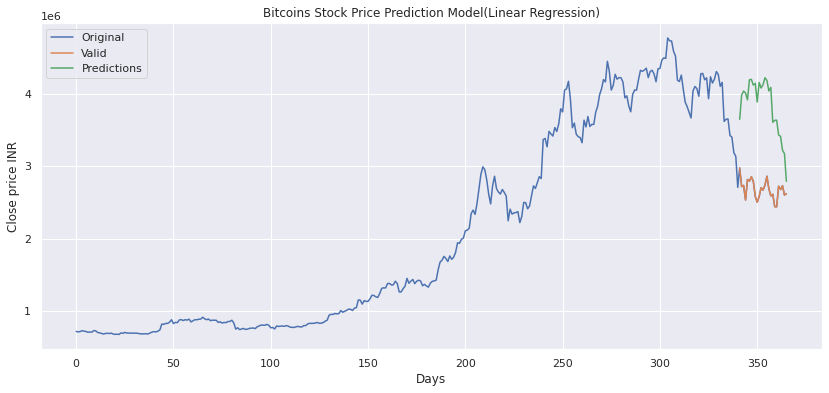

In [ ]:
#Visualize Linear Regression predictions
predictions = linearprediction
valid = btc[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(14,6))
plt.title("Bitcoins Stock Price Prediction Model(Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Close price INR")
plt.plot(btc['Close'])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()